## Sales forecasting using fbprophet

In [1]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
import warnings
warnings.filterwarnings('ignore')

C:\Users\sonal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#read the datasets available
df=pd.read_csv('train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.shape

(913000, 4)

In [4]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [5]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [6]:
#converting date column to datetime datatype
df['date']=pd.to_datetime(df['date'])

In [7]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [8]:
df.drop(columns='store',inplace=True)

In [9]:
df.dtypes

date     datetime64[ns]
item              int64
sales             int64
dtype: object

In [10]:
#choosing 6 products for sales forecasting
item_one=df.loc[df['item']==1].reset_index()
item_two=df.loc[df['item']==2].reset_index()
item_three=df.loc[df['item']==3].reset_index()
item_four=df.loc[df['item']==5].reset_index()
item_five=df.loc[df['item']==8].reset_index()
item_six=df.loc[df['item']==9].reset_index()

In [11]:
# finding the smonthly sales across all stores for each of the 6 chosen items
lst=[item_one,item_two,item_three,item_four,item_five,item_six]
df_1=pd.DataFrame(columns=['date','sales','item'])
for i in lst:
    item_no=i.loc[0,'item']
    i.drop(columns=['item','index'],inplace=True)
    i= i.resample('MS', on='date').sum()
    i=i.reset_index()
    # average sales in each store for a total of 10 stores   
    i['sales']=i['sales']/10
    i['item']=item_no
    df_1=pd.concat([df_1, i])
df_1.head()

,date,sales,item
0,2013-01-01,379.4,1
1,2013-02-01,386.3,1
2,2013-03-01,519.0,1
3,2013-04-01,578.3,1
4,2013-05-01,629.8,1


In [12]:
df_1=df_1.reset_index()

Text(0.5, 1.0, 'Monthly sales time series chart for the 6 products')

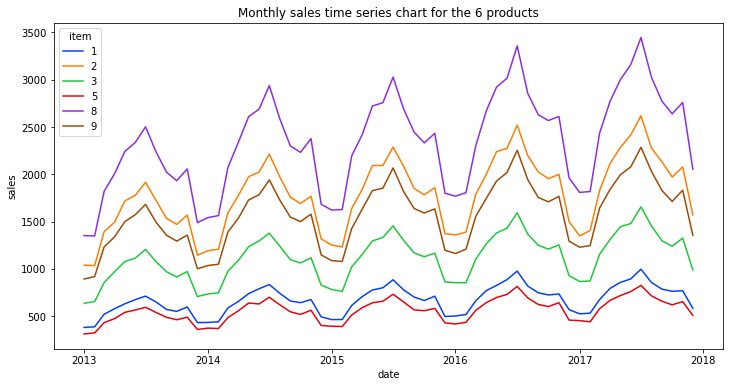

In [13]:
#PLotting the monthly avg sales from 2013 to 2017
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_1, x="date", y="sales", hue="item",palette='bright')
plt.title('Monthly sales time series chart for the 6 products')

In [14]:
# Separating out the items/products into separate dataframes for further analysis
item_one=item_one.resample('MS', on='date').sum().reset_index()
item_one['sales']=item_one['sales']/10
item_one.rename(columns={'date':'ds', 'sales':'y'}, inplace=True)
item_two=item_two.resample('MS', on='date').sum().reset_index()
item_two['sales']=item_two['sales']/10
item_two.rename(columns={'date':'ds', 'sales':'y'}, inplace=True)
item_three=item_three.resample('MS', on='date').sum().reset_index()
item_three['sales']=item_three['sales']/10
item_three.rename(columns={'date':'ds', 'sales':'y'}, inplace=True)
item_four=item_four.resample('MS', on='date').sum().reset_index()
item_four['sales']=item_four['sales']/10
item_four.rename(columns={'date':'ds', 'sales':'y'}, inplace=True)
item_five=item_five.resample('MS', on='date').sum().reset_index()
item_five['sales']=item_five['sales']/10
item_five.rename(columns={'date':'ds', 'sales':'y'}, inplace=True)
item_six=item_six.resample('MS', on='date').sum().reset_index()
item_six['sales']=item_six['sales']/10
item_six.rename(columns={'date':'ds', 'sales':'y'}, inplace=True)

In [15]:
#Initialising prophet model for each product/item
model_1=Prophet()
model_2=Prophet()
model_3=Prophet()
model_4=Prophet()
model_5=Prophet()
model_6=Prophet()

In [16]:
#Fitting the prophet models with dataset for each item
model_1.fit(item_one)
model_2.fit(item_two)
model_3.fit(item_three)
model_4.fit(item_four)
model_5.fit(item_five)
model_6.fit(item_six)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [17]:
#Creating future dates for making future sales prediction using prophet model
future_dates_1=model_1.make_future_dataframe(periods=12,freq='MS')
prediction_1=model_1.predict(future_dates_1)
future_dates_2=model_2.make_future_dataframe(periods=12,freq='MS')
prediction_2=model_2.predict(future_dates_2)
future_dates_3=model_3.make_future_dataframe(periods=12,freq='MS')
prediction_3=model_3.predict(future_dates_3)
future_dates_4=model_4.make_future_dataframe(periods=12,freq='MS')
prediction_4=model_4.predict(future_dates_4)
future_dates_5=model_5.make_future_dataframe(periods=12,freq='MS')
prediction_5=model_5.predict(future_dates_5)
future_dates_6=model_6.make_future_dataframe(periods=12,freq='MS')
prediction_6=model_6.predict(future_dates_6)

Text(0.5, 1.0, 'Sales forecast for item_6 for 2018')

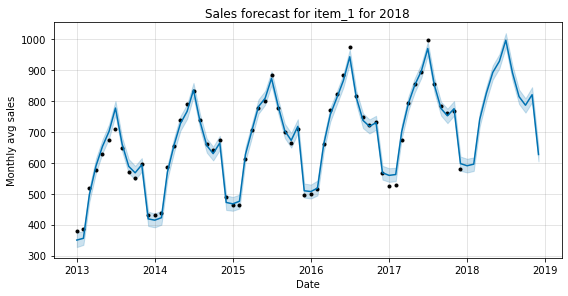

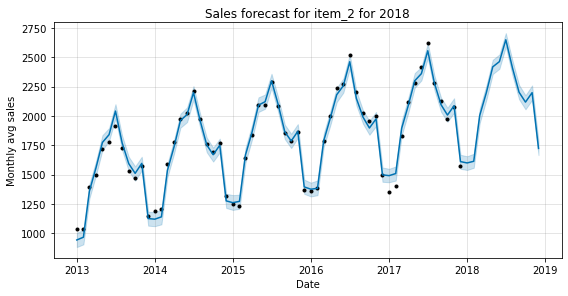

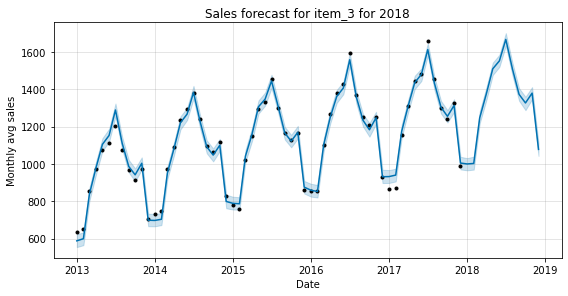

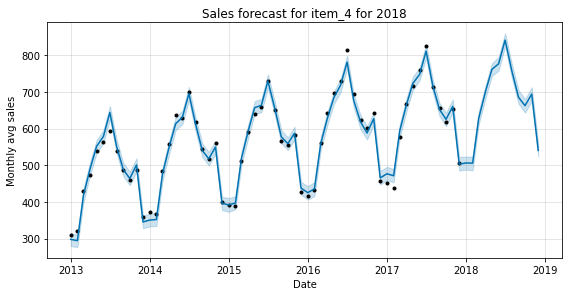

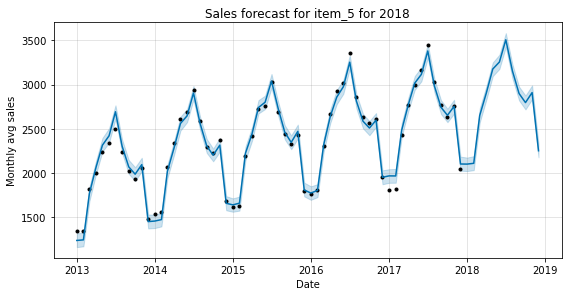

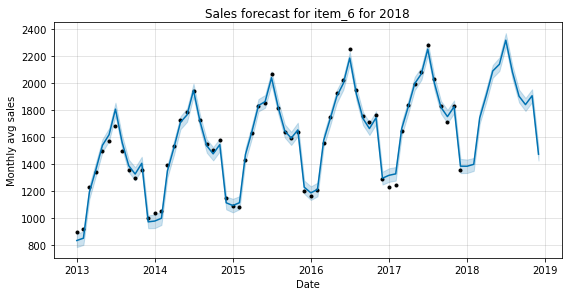

In [18]:
#Plotting the sales forecast for the different products
model_1.plot(prediction_1,xlabel='Date',ylabel='Monthly avg sales',figsize=(8,4))
plt.title('Sales forecast for item_1 for 2018')
model_2.plot(prediction_2,xlabel='Date',ylabel='Monthly avg sales',figsize=(8,4))
plt.title('Sales forecast for item_2 for 2018')
model_3.plot(prediction_3,xlabel='Date',ylabel='Monthly avg sales',figsize=(8,4))
plt.title('Sales forecast for item_3 for 2018')
model_4.plot(prediction_4,xlabel='Date',ylabel='Monthly avg sales',figsize=(8,4))
plt.title('Sales forecast for item_4 for 2018')
model_5.plot(prediction_5,xlabel='Date',ylabel='Monthly avg sales',figsize=(8,4))
plt.title('Sales forecast for item_5 for 2018')
model_6.plot(prediction_6,xlabel='Date',ylabel='Monthly avg sales',figsize=(8,4))
plt.title('Sales forecast for item_6 for 2018')

In [19]:
#Doing cross validations for each model training for better accuracy 
df1_cv = cross_validation(model_1, initial='730 days', period='90 days', horizon = '180 days')
df2_cv = cross_validation(model_2, initial='730 days', period='90 days', horizon = '180 days')
df3_cv = cross_validation(model_3, initial='730 days', period='90 days', horizon = '180 days')
df4_cv = cross_validation(model_4, initial='730 days', period='90 days', horizon = '180 days')
df5_cv = cross_validation(model_5, initial='730 days', period='90 days', horizon = '180 days')
df6_cv = cross_validation(model_6, initial='730 days', period='90 days', horizon = '180 days')

INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-03-17 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-03-17 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-03-17 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-03-17 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-03-17 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.
INFO:fbprophet:Making 10 forecasts with cutoffs between 2015-03-17 00:00:00 and 2017-06-04 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 20.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [20]:
# Determining the RMSE value as performance metric for each model
print('RMSE for item 1: ',round(performance_metrics(df1_cv).rmse.mean(),2))
print('RMSE for item 2: ',round(performance_metrics(df2_cv).rmse.mean(),2))
print('RMSE for item 3: ',round(performance_metrics(df3_cv).rmse.mean(),2))
print('RMSE for item 4: ',round(performance_metrics(df4_cv).rmse.mean(),2))
print('RMSE for item 5: ',round(performance_metrics(df5_cv).rmse.mean(),2))
print('RMSE for item 6: ',round(performance_metrics(df6_cv).rmse.mean(),2))

RMSE for item 1:  40.67
RMSE for item 2:  116.23
RMSE for item 3:  69.96
RMSE for item 4:  31.82
RMSE for item 5:  148.36
RMSE for item 6:  97.9


In [21]:
# Sales forecast of all 6 different products
forecast=pd.DataFrame()
forecast['time']=prediction_1['ds'].values
forecast['y1_pred']=prediction_1['yhat']
forecast['y2_pred']=prediction_2['yhat']
forecast['y3_pred']=prediction_3['yhat']
forecast['y4_pred']=prediction_4['yhat']
forecast['y5_pred']=prediction_5['yhat']
forecast['y6_pred']=prediction_6['yhat']

In [23]:
forecast=forecast.set_index('time')

<AxesSubplot:title={'center':'Plotting sales forecast for 6 items for 2018'}, xlabel='time'>

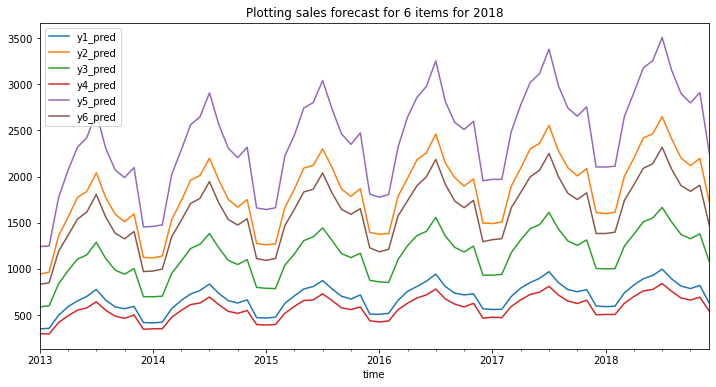

In [25]:
forecast[['y1_pred','y2_pred','y3_pred','y4_pred','y5_pred','y6_pred']].plot(figsize=(12,6),title='Plotting sales forecast for 6 items for 2018')